# ***Portfolio Analysis with Yahoo! Finance data pt. 1: Return, risk and Sharpe Ratio***
---

> Objective: structure a portfolio and evaluate its main metrics w/ brazilian financial assets.

Link: https://finance.yahoo.com/

# Importing packages
---

In [30]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web

import matplotlib.pyplot as plt

# Collecting data on selected assets
---

In [31]:
# Selecting assets and defining number of assets

assets = ['PETR4.SA', 'ITUB4.SA', 'VALE3.SA', 'BRFS3.SA', 'BPAC11.SA', 'BBAS3.SA', 'MGLU3.SA', 'TOTS3.SA']
noa = len(assets)
noa

8

In [32]:
# Creating a dataframe to store assets adjusted prices 

adj_prices = pd.DataFrame()

for ass in assets:
    adj_prices[ass] = web.DataReader(ass, data_source = 'yahoo', start = '2019-01-01')['Adj Close']

adj_prices

,PETR4.SA,ITUB4.SA,VALE3.SA,BRFS3.SA,BPAC11.SA,BBAS3.SA,MGLU3.SA,TOTS3.SA
Date,,,,,,,,
2019-01-02,15.524002,32.936337,39.107300,22.379999,5.773697,39.050579,5.641578,9.294828
2019-01-03,15.904679,33.479324,37.507496,21.490000,6.012528,39.211292,5.581216,9.508952
2019-01-04,15.949845,32.918522,39.949306,21.450001,6.225854,39.211292,5.411353,9.771734
2019-01-07,16.201483,32.980839,39.734982,21.590000,6.353385,38.954159,5.495375,9.560858
2019-01-08,16.104696,33.399208,40.117702,22.930000,6.235074,38.512234,5.451089,9.171545
...,...,...,...,...,...,...,...,...
2022-07-15,27.959999,22.549999,68.370003,15.530000,21.600000,33.279999,2.780000,23.260000
2022-07-18,28.600000,22.850000,68.730003,14.650000,21.590000,33.750000,2.770000,23.389999
2022-07-19,29.180000,23.620001,68.879997,14.960000,22.740000,34.660000,2.790000,24.670000


## Plotting assets prices over time

<AxesSubplot:xlabel='Date'>

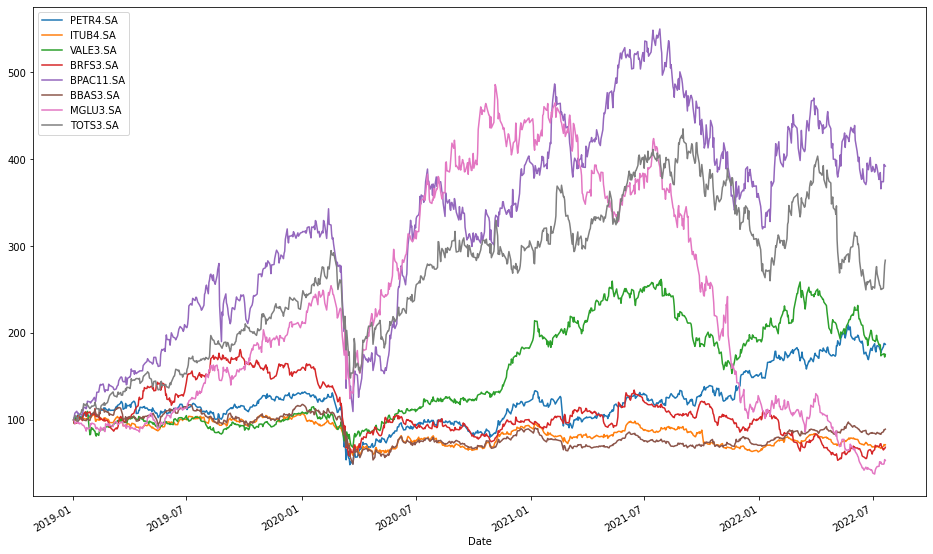

In [33]:
# Normalized fashion graph

(adj_prices / adj_prices.iloc[0] * 100).plot(figsize = (16, 10))

# Assets returns
---

In [34]:
# (I) First way to calculate assets returns 

'''
rets = (adj_prices / adj_prices.shift(1)) - 1
rets
'''

# (II) Second way to calculate assets returns 

rets = adj_prices.pct_change().dropna()
rets

,PETR4.SA,ITUB4.SA,VALE3.SA,BRFS3.SA,BPAC11.SA,BBAS3.SA,MGLU3.SA,TOTS3.SA
Date,,,,,,,,
2019-01-03,0.024522,0.016486,-0.040908,-0.039768,0.041365,0.004116,-0.010699,0.023037
2019-01-04,0.002840,-0.016751,0.065102,-0.001861,0.035480,0.000000,-0.030435,0.027635
2019-01-07,0.015777,0.001893,-0.005365,0.006527,0.020484,-0.006558,0.015527,-0.021580
2019-01-08,-0.005974,0.012685,0.009632,0.062066,-0.018622,-0.011345,-0.008059,-0.040719
2019-01-09,0.020834,0.015192,0.024423,0.027039,0.001526,-0.002712,-0.003339,0.038557
...,...,...,...,...,...,...,...,...
2022-07-15,0.017097,0.018059,0.006181,-0.044308,0.022727,0.020546,-0.044674,0.000861
2022-07-18,0.022890,0.013304,0.005265,-0.056665,-0.000463,0.014123,-0.003597,0.005589
2022-07-19,0.020280,0.033698,0.002182,0.021160,0.053265,0.026963,0.007220,0.054724


## Assets cumulative return

In [35]:
# Calculating cumulative returns:

cum_rets = (1 + rets).cumprod()
cum_rets

,PETR4.SA,ITUB4.SA,VALE3.SA,BRFS3.SA,BPAC11.SA,BBAS3.SA,MGLU3.SA,TOTS3.SA
Date,,,,,,,,
2019-01-03,1.024522,1.016486,0.959092,0.960232,1.041365,1.004116,0.989301,1.023037
2019-01-04,1.027431,0.999459,1.021531,0.958445,1.078313,1.004116,0.959191,1.051309
2019-01-07,1.043641,1.001351,1.016050,0.964701,1.100402,0.997531,0.974085,1.028621
2019-01-08,1.037406,1.014054,1.025837,1.024576,1.079910,0.986214,0.966235,0.986736
2019-01-09,1.059019,1.029459,1.050891,1.052279,1.081558,0.983539,0.963009,1.024782
...,...,...,...,...,...,...,...,...
2022-07-15,1.801082,0.684654,1.748267,0.693923,3.741104,0.852228,0.492770,2.502467
2022-07-18,1.842308,0.693763,1.757472,0.654602,3.739372,0.864264,0.490997,2.516453
2022-07-19,1.879670,0.717141,1.761308,0.668454,3.938551,0.887567,0.494542,2.654164


## Annualized returns

Annualized returns based on our daily information dataframe can be calculated following this relationship:

### $$r_{a_i} = (1 + r_i)^\frac{n}{N} - 1$$

where: 

$n = 252$ for 252 working days in Brazil;

$N  = $lenght of date in the dataframe

$r_{a_i}$: annualized return

$1 + r_i$: returns of our portfolio already measured.

In [36]:
rets.mean()

PETR4.SA     0.001177
ITUB4.SA    -0.000129
VALE3.SA     0.001014
BRFS3.SA     0.000040
BPAC11.SA    0.002166
BBAS3.SA     0.000218
MGLU3.SA     0.000019
TOTS3.SA     0.001587
dtype: float64

In [37]:
ann_rets = rets.mean() * 252 # 252 working/trading days
ann_rets

PETR4.SA     0.296573
ITUB4.SA    -0.032468
VALE3.SA     0.255536
BRFS3.SA     0.009983
BPAC11.SA    0.545804
BBAS3.SA     0.054979
MGLU3.SA     0.004729
TOTS3.SA     0.399890
dtype: float64

## Returns covariance and correlations

In [38]:
cov_rets = rets.cov() * 252
cov_rets

,PETR4.SA,ITUB4.SA,VALE3.SA,BRFS3.SA,BPAC11.SA,BBAS3.SA,MGLU3.SA,TOTS3.SA
PETR4.SA,0.226568,0.097379,0.108321,0.092256,0.133830,0.132820,0.106079,0.078358
ITUB4.SA,0.097379,0.126909,0.058398,0.056408,0.101196,0.115001,0.071273,0.048126
VALE3.SA,0.108321,0.058398,0.188197,0.056829,0.086209,0.079026,0.080831,0.050628
BRFS3.SA,0.092256,0.056408,0.056829,0.235122,0.094600,0.079684,0.101116,0.075981
BPAC11.SA,0.133830,0.101196,0.086209,0.094600,0.308449,0.134345,0.168322,0.121721
BBAS3.SA,0.132820,0.115001,0.079026,0.079684,0.134345,0.173286,0.106184,0.076250
MGLU3.SA,0.106079,0.071273,0.080831,0.101116,0.168322,0.106184,0.367612,0.139446
TOTS3.SA,0.078358,0.048126,0.050628,0.075981,0.121721,0.076250,0.139446,0.202195


In [39]:
corr_rets = rets.corr(method = 'pearson')
corr_rets

,PETR4.SA,ITUB4.SA,VALE3.SA,BRFS3.SA,BPAC11.SA,BBAS3.SA,MGLU3.SA,TOTS3.SA
PETR4.SA,1.000000,0.574276,0.524574,0.399713,0.506247,0.670319,0.367567,0.366099
ITUB4.SA,0.574276,1.000000,0.377874,0.326550,0.511477,0.775488,0.329977,0.300433
VALE3.SA,0.524574,0.377874,1.000000,0.270159,0.357812,0.437607,0.307309,0.259539
BRFS3.SA,0.399713,0.326550,0.270159,1.000000,0.351279,0.394770,0.343936,0.348474
BPAC11.SA,0.506247,0.511477,0.357812,0.351279,1.000000,0.581097,0.499868,0.487401
BBAS3.SA,0.670319,0.775488,0.437607,0.394770,0.581097,1.000000,0.420711,0.407353
MGLU3.SA,0.367567,0.329977,0.307309,0.343936,0.499868,0.420711,1.000000,0.511479
TOTS3.SA,0.366099,0.300433,0.259539,0.348474,0.487401,0.407353,0.511479,1.000000


# Portfolio features
---

> Instead of creating an Equal Weighted Portfolio (EWP), lets use numpy to assign random weights to the assets as a form os practicing np library abilities.

## Selecting assets weights

In [40]:
seed = 13
np.random.seed(seed)
port_weights = np.random.random(noa) # creating n random numbers, where n = number of assets in portfolio
port_weights /= np.sum(port_weights)      # x /= n --> x = x/n, i.e, the sum of weights must equal 1
port_weights

array([0.13848247, 0.04229805, 0.1467761 , 0.17196724, 0.17318733,
       0.08074396, 0.10844984, 0.13809502])

## Portfolio expected returns

#### General formula for expected portfolio return

$
\mu_p = E(\sum_{i = 1}^{n} w_ir_i)
$

$
\mu_p = \sum_{i = 1}^{n} w_i E(r_i)
$

$
\mu_p = \sum_{i = 1}^{n} w_i\mu_i
$

$$
\mu_p = w_i^T\mu_i
$$

where:

$\mu_p$: portfolio return

$r_i$: asset state-dependent return, normally distributed

$w_i$: asset weight

In [41]:
portfolio_ret = np.sum(rets.mean() * port_weights) * 252 # expected portfolio return
portfolio_ret

0.23362131846840803

# Portfolio Risk
---

#### Security variance

$$
\sigma_i = E((r_i - \mu_i)^2)
$$

#### Portfolio variance

$$
\sigma_p^2 = E((r - \mu)^2)
$$

#### Portfolio standart deviation or valatility

$$
\sigma_p = \sqrt{\sigma_p^2}
$$

In [42]:
portfolio_var = np.dot(weights.T, np.dot(rets.cov() * 252, weights))
portfolio_var

0.10948053280810185

In [43]:
portfolio_vol = np.sqrt(portfolio_var)
portfolio_vol

0.3308784260239731

# Possible risk-return profiles

Using Monte Carlo Simulations to visualize the possible risk-return profile for the securities selected and their statistical features we calculated above.

In [44]:
port_rets = []
port_vols = []

for p in range(2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    port_rets.append(np.sum(rets.mean() * weights) * 252)
    port_vols.append(np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights))))

port_rets = np.array(port_rets)
port_vols = np.array(port_vols) 

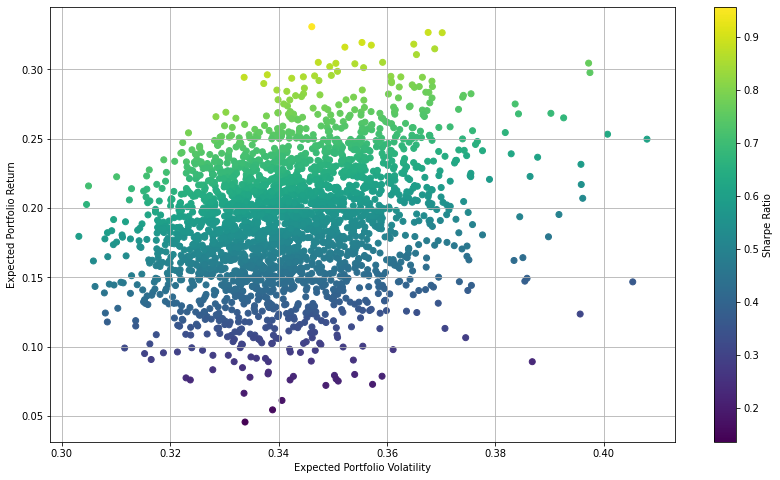

In [45]:
# Plotting results from simulation

plt.figure(figsize = (14, 8))
plt.scatter(x = port_vols, y = port_rets, c = port_rets / port_vols, marker = 'o')
plt.grid(True)
plt.xlabel('Expected Portfolio Volatility')
plt.ylabel('Expected Portfolio Return')
plt.colorbar(label = 'Sharpe Ratio')

#### Sharpe Ratio

$$
SR = \frac{\mu_p - r_f}{\sigma_p}
$$

$r_f$: risk-free rate, assumed to be 0, but for Brazil, we can assume the rates from T-bills.

In summary, the Sharpe Ratio gives us the excess retruns per unit of risk. Subtracting the risk-free rate allows us to split the total rate in rate for risk-taking investments and risk-free investments (obtaining risk-premia). 

# Conclusion pt.1

In [53]:
our_portfolio = pd.DataFrame((np.round(port_weights, 4) * 100), assets).T
our_portfolio['return'] = portfolio_ret
our_portfolio['volatility'] = portfolio_vol
our_portfolio

,PETR4.SA,ITUB4.SA,VALE3.SA,BRFS3.SA,BPAC11.SA,BBAS3.SA,MGLU3.SA,TOTS3.SA,return,volatility
0,13.85,4.23,14.68,17.2,17.32,8.07,10.84,13.81,0.233621,0.330878


W/ this, we can inicially see that our portfolio does not have the best Sharpe Ratio among the 2500 simulated portfolios. That means we have space to apply optmization techniques to find the best combination of weights and assets that maximize returns controlling for valatility restrictions.